In [1]:
ls /media/andre

11D9-5C57/  5161-4A93/  9B57-8640/  maternal/


In [2]:
from pathlib import Path 

# On my system, this is where the storage devices are mounted
MOUNT_POINT = Path("/media/andre")

# The names of drives the data exists
DRIVES = [
    '11D9-5C57',
    '5161-4A93',
    '9B57-8640'
]

# Where we want to store the videos
OUTPUT_DRIVE = MOUNT_POINT / 'maternal'

In [3]:
%%time

total_size = 0
for drive in DRIVES:
    # glob is a useful tool for searching folders, here we tell it to find every file
    files = (MOUNT_POINT / drive).glob('**/*')
    
    # Only keep the files (discard directories)
    files = list(filter(lambda x: x.is_file(), files)) 
    
    # Get the size of each file
    sizes = list(map(lambda x: x.stat().st_size, files)) 
    size = sum(sizes)
    total_size += size
    
    # print the size in gigabytes
    print(f"Drive {drive} is {size / 1e9:.2f}GB")
    
# print the total size
print(f"Total: {total_size / 1e9:.2f}GB")

Drive 11D9-5C57 is 997.12GB
Drive 5161-4A93 is 491.29GB
Drive 9B57-8640 is 705.03GB
Total: 2193.44GB
CPU times: user 64.3 ms, sys: 15.8 ms, total: 80.1 ms
Wall time: 79.9 ms


In [4]:
total_size = 0

# Use a set instead of a list to ignore duplicates
extensions = set()
for drive in DRIVES:
    files = (MOUNT_POINT / drive).glob('**/*')
    files = list(filter(lambda x: x.is_file(), files))
    
    # Get the extensions
    for filepath in files:
        fileparts = filepath.parts[-1].split('.')
        
        # Some files don't have extensions, ignore those
        if len(fileparts) > 1:
            extensions.add(fileparts[-1])

print("Extensions: ", list(extensions))

Extensions:  ['wbcat', '159', 'updates', '2', '_KO14 day 20', 'indexGroups', '_KO12 day 15', 'loc', 'directoryStoreFile', 'ini', '9', 'indexArrays', '1', 'wbverify', '_KO15 Day 20', 'indexHead', 'indexPositionTable', 'donotpresent', 'indexDirectory', '_KO16 day 15', 'mp4', 'state', '_KO112 D15', 'shadow', 'created', 'indexCompactDirectory', 'indexBigDates', '_ko9 day 20', 'zip', '10', 'indexUpdates', '_KO16 day 20', '_WT3 day 15', 'txt', 'bin', 'SnowLeopard', '_KO15 day 15', 'shadowIndexArrays', 'shadowIndexHead', 'dat', '_KO10 DAY 15', 'Trashes', 'Cab', 'indexIds', 'modified', '_KO152 Day20', 'shadowIndexDirectory', 'shadowIndexPositionTable', 'shadowIndexTermIds', '_KO152 DAY 15', 'plist', 'indexPostings', 'indexPositions', 'shadowIndexGroups', 'shadowIndexCompactDirectory', 'MPG', 'indexTermIds', '_KO10 DAY 20', 'db']


In [5]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    print(f"Number of videos in {drive}: {len(videos)}")

Number of videos in 11D9-5C57: 1102
Number of videos in 5161-4A93: 528
Number of videos in 9B57-8640: 673


In [6]:
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    videos = list(map(str, videos)) # makes things a bit prettier
    print(videos)

['/media/andre/11D9-5C57/ch04_20141026223910.mp4', '/media/andre/11D9-5C57/ch04_20141027002615.mp4', '/media/andre/11D9-5C57/._ch02_20141004031546.mp4', '/media/andre/11D9-5C57/ch04_20141027021320.mp4', '/media/andre/11D9-5C57/ch04_20141027040025.mp4', '/media/andre/11D9-5C57/ch04_20141027054731.mp4', '/media/andre/11D9-5C57/ch04_20141027073438.mp4', '/media/andre/11D9-5C57/ch07_20141029182333.mp4', '/media/andre/11D9-5C57/ch07_20141029185404.mp4', '/media/andre/11D9-5C57/ch07_20141029204109.mp4', '/media/andre/11D9-5C57/ch07_20141029222816.mp4', '/media/andre/11D9-5C57/ch07_20141030001521.mp4', '/media/andre/11D9-5C57/ch07_20141030020226.mp4', '/media/andre/11D9-5C57/ch07_20141030034933.mp4', '/media/andre/11D9-5C57/ch07_20141030053638.mp4', '/media/andre/11D9-5C57/ch07_20141030072343.mp4', '/media/andre/11D9-5C57/ch07_20141030091049.mp4', '/media/andre/11D9-5C57/ch07_20141030105756.mp4', '/media/andre/11D9-5C57/ch07_20141030124501.mp4', '/media/andre/11D9-5C57/ch07_20141030143208.mp4

In [7]:
def is_visible(filepath):
    for part in filepath.parts:
        if part.startswith('.'):
            return False
        
    return True

def is_not_recycled(filepath):
    for part in filepath.parts:
        if part.startswith('$RECYCLE'):
            return False
        
    return True
    
all_videos = []
for drive in DRIVES:
    videos = (
        list((MOUNT_POINT / drive).glob('**/*.mp4')) + 
        list((MOUNT_POINT / drive).glob('**/*.MPG'))
    )
    
    all_videos_len = len(videos)
    videos = list(filter(is_visible, videos))
    videos = list(filter(is_not_recycled, videos))
    after_filtering_len = len(videos)
    all_videos += videos
    
    print(f"Length of videos before filtering: {all_videos_len:4}, after: {after_filtering_len}")

Length of videos before filtering: 1102, after: 924
Length of videos before filtering:  528, after: 439


Length of videos before filtering:  673, after: 553


In [8]:
pip install -q treelib

Note: you may need to restart the kernel to use updated packages.


In [9]:
import treelib
from tqdm import tqdm

tree = treelib.Tree()
tree.create_node('/', '/')
for video in tqdm(all_videos):
    video = video.relative_to(MOUNT_POINT)
    parts = video.parts[:-1] # don't include filename
    for i in range(1,len(parts)+1):
        uid = '/'.join(parts[:i])
        name = parts[i-1]
        
        if tree.contains(uid):
            continue 
        
        # include parent
        if i > 1:
            parent_uid = '/'.join(parts[:i-1])
            tree.create_node(name, uid, parent=parent_uid)
        else:
            tree.create_node(name, uid, parent='/')
            
tree.show()

  0%|          | 0/1916 [00:00<?, ?it/s]

100%|██████████| 1916/1916 [00:00<00:00, 147842.72it/s]

/
├── 11D9-5C57
│   ├── Day10s
│   │   └── ko10 day 10
│   ├── KO10 DAY 15
│   ├── KO10 DAY 20
│   ├── KO112 D15
│   ├── KO12 day 10
│   ├── KO12 day 15
│   ├── KO14 day 20
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO152 DAY 10
│   ├── KO152 DAY 15
│   ├── KO152 Day20
│   ├── KO16 day 15
│   ├── KO16 day 20
│   ├── WT3 DAY 20
│   ├── WT3 day 10
│   ├── WT3 day 15
│   ├── WT6 DAY 20
│   ├── WT72 D15
│   ├── WT72 DAY 10
│   ├── WT72 DAY 15
│   ├── WT72 DAY 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 DAY 15
│   ├── WT8 day 20
│   ├── WT82 D10
│   ├── WT82 D20
│   ├── WT82 DAY 15
│   ├── WT82 DAY 20
│   ├── ko9 day 20
│   └── wt6 day 15
├── 5161-4A93
│   ├── Day10s
│   ├── KO112 D15
│   ├── KO15 Day 20
│   ├── KO15 day 15
│   ├── KO9 Day 20
│   ├── WT72 D15
│   ├── WT72 Day 20
│   │   └── WT12 D15
│   │       └── WT12 day 15
│   ├── WT8 Day 15
│   └── WT82 D20
└── 9B57-8640
    ├── AVIDEOS
    │   └── stef videos
    ├── KO10 day 10
    ├── KO11 day 20
    ├── KO1

In [10]:
import pandas as pd
import cv2
from tqdm import tqdm

metadata = []
for video in tqdm(all_videos):
    cap = cv2.VideoCapture(str(video))
    _metadata = {
        'file': video,
        'filetype': video.parts[-1].split('.')[-1],
        'frames': int(cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'fps': float(cap.get(cv2.CAP_PROP_FPS)),
        'width': int(cap.get(cv2.CAP_PROP_FRAME_WIDTH)),
        'height': int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)),
        'size': video.stat().st_size
    }
    metadata.append(_metadata)
    
metadata_df = pd.DataFrame(metadata)
metadata_df

  0%|          | 0/1916 [00:00<?, ?it/s]

  0%|          | 8/1916 [00:00<00:25, 75.94it/s]

  1%|          | 18/1916 [00:00<00:21, 86.45it/s]

  1%|▏         | 27/1916 [00:00<00:23, 78.93it/s]

  2%|▏         | 35/1916 [00:00<00:24, 76.27it/s]

  2%|▏         | 43/1916 [00:00<00:24, 75.75it/s]

  3%|▎         | 52/1916 [00:00<00:23, 78.27it/s]

  3%|▎         | 61/1916 [00:00<00:22, 81.13it/s]

  4%|▎         | 71/1916 [00:00<00:21, 85.53it/s]

  4%|▍         | 81/1916 [00:00<00:20, 89.04it/s]

  5%|▍         | 90/1916 [00:01<00:20, 87.07it/s]

  5%|▌         | 99/1916 [00:01<00:21, 82.64it/s]

  6%|▌         | 108/1916 [00:01<00:22, 80.96it/s]

  6%|▌         | 117/1916 [00:01<00:21, 82.65it/s]

  7%|▋         | 126/1916 [00:01<00:29, 61.72it/s]

  7%|▋         | 134/1916 [00:01<00:27, 65.49it/s]

  8%|▊         | 144/1916 [00:01<00:24, 71.89it/s]

  8%|▊         | 153/1916 [00:01<00:23, 74.02it/s]

  8%|▊         | 161/1916 [00:02<00:25, 69.28it/s]

  9%|▉         | 170/1916 [00:02<00:24, 70.66it/s]

  9%|▉         | 178/1916 [00:02<00:24, 71.14it/s]

 10%|▉         | 186/1916 [00:02<00:24, 70.48it/s]

 10%|█         | 194/1916 [00:02<00:24, 70.25it/s]

 11%|█         | 202/1916 [00:02<00:25, 67.67it/s]

 11%|█         | 209/1916 [00:02<00:25, 66.91it/s]

 11%|█▏        | 218/1916 [00:02<00:23, 72.73it/s]

 12%|█▏        | 227/1916 [00:03<00:22, 76.72it/s]

 12%|█▏        | 239/1916 [00:03<00:19, 87.10it/s]

 13%|█▎        | 249/1916 [00:03<00:18, 89.41it/s]

 14%|█▎        | 260/1916 [00:03<00:17, 95.22it/s]

 14%|█▍        | 271/1916 [00:03<00:16, 98.45it/s]

 15%|█▍        | 281/1916 [00:03<00:17, 93.93it/s]

 15%|█▌        | 291/1916 [00:03<00:17, 90.67it/s]

 16%|█▌        | 301/1916 [00:03<00:20, 77.01it/s]

 16%|█▌        | 310/1916 [00:04<00:22, 69.85it/s]

 17%|█▋        | 318/1916 [00:04<00:23, 68.88it/s]

 17%|█▋        | 328/1916 [00:04<00:21, 74.84it/s]

 18%|█▊        | 336/1916 [00:04<00:20, 76.11it/s]

 18%|█▊        | 344/1916 [00:04<00:21, 73.41it/s]

 18%|█▊        | 352/1916 [00:04<00:22, 70.37it/s]

 19%|█▉        | 360/1916 [00:04<00:22, 69.33it/s]

 19%|█▉        | 368/1916 [00:04<00:24, 64.44it/s]

 20%|█▉        | 378/1916 [00:04<00:21, 72.36it/s]

 20%|██        | 386/1916 [00:05<00:21, 70.92it/s]

 21%|██        | 394/1916 [00:05<00:21, 70.88it/s]

 21%|██        | 402/1916 [00:05<00:23, 65.35it/s]

 21%|██▏       | 409/1916 [00:05<00:24, 62.16it/s]

 22%|██▏       | 416/1916 [00:05<00:24, 61.00it/s]

 22%|██▏       | 423/1916 [00:05<00:25, 58.75it/s]

 23%|██▎       | 432/1916 [00:05<00:22, 66.42it/s]

 23%|██▎       | 440/1916 [00:05<00:21, 69.85it/s]

 23%|██▎       | 448/1916 [00:06<00:21, 67.77it/s]

 24%|██▍       | 456/1916 [00:06<00:20, 69.58it/s]

 24%|██▍       | 465/1916 [00:06<00:20, 72.54it/s]

 25%|██▍       | 473/1916 [00:06<00:19, 73.16it/s]

 25%|██▌       | 483/1916 [00:06<00:18, 79.34it/s]

 26%|██▌       | 491/1916 [00:06<00:18, 77.60it/s]

 26%|██▌       | 501/1916 [00:06<00:17, 81.85it/s]

 27%|██▋       | 510/1916 [00:06<00:16, 83.27it/s]

 27%|██▋       | 519/1916 [00:06<00:17, 81.04it/s]

 28%|██▊       | 528/1916 [00:07<00:16, 83.43it/s]

 28%|██▊       | 537/1916 [00:07<00:17, 79.78it/s]

 28%|██▊       | 546/1916 [00:07<00:16, 81.56it/s]

 29%|██▉       | 556/1916 [00:07<00:15, 85.36it/s]

 30%|██▉       | 566/1916 [00:07<00:15, 88.07it/s]

 30%|███       | 575/1916 [00:07<00:15, 85.47it/s]

 31%|███       | 585/1916 [00:07<00:15, 87.03it/s]

 31%|███       | 594/1916 [00:07<00:15, 83.47it/s]

 31%|███▏      | 603/1916 [00:07<00:15, 84.07it/s]

 32%|███▏      | 613/1916 [00:08<00:14, 87.96it/s]

 32%|███▏      | 622/1916 [00:08<00:14, 86.35it/s]

 33%|███▎      | 631/1916 [00:08<00:15, 83.55it/s]

 33%|███▎      | 640/1916 [00:08<00:15, 80.34it/s]

 34%|███▍      | 649/1916 [00:08<00:15, 81.63it/s]

 34%|███▍      | 658/1916 [00:08<00:16, 78.09it/s]

 35%|███▍      | 667/1916 [00:08<00:15, 80.97it/s]

 35%|███▌      | 677/1916 [00:08<00:14, 85.13it/s]

 36%|███▌      | 686/1916 [00:08<00:14, 85.64it/s]

 36%|███▋      | 696/1916 [00:09<00:14, 86.95it/s]

 37%|███▋      | 705/1916 [00:09<00:14, 84.41it/s]

 37%|███▋      | 714/1916 [00:09<00:14, 83.11it/s]

 38%|███▊      | 723/1916 [00:09<00:14, 82.45it/s]

 38%|███▊      | 732/1916 [00:09<00:14, 83.31it/s]

 39%|███▊      | 741/1916 [00:09<00:14, 83.38it/s]

 39%|███▉      | 750/1916 [00:09<00:14, 80.32it/s]

 40%|███▉      | 759/1916 [00:09<00:14, 81.50it/s]

 40%|████      | 768/1916 [00:09<00:13, 83.79it/s]

 41%|████      | 777/1916 [00:10<00:14, 80.85it/s]

 41%|████      | 786/1916 [00:10<00:14, 76.27it/s]

 41%|████▏     | 794/1916 [00:10<00:14, 75.39it/s]

 42%|████▏     | 802/1916 [00:10<00:15, 72.93it/s]

 42%|████▏     | 812/1916 [00:10<00:13, 79.18it/s]

 43%|████▎     | 822/1916 [00:10<00:13, 83.26it/s]

 43%|████▎     | 831/1916 [00:10<00:12, 83.54it/s]

 44%|████▍     | 840/1916 [00:10<00:12, 83.19it/s]

 44%|████▍     | 849/1916 [00:10<00:12, 83.91it/s]

 45%|████▍     | 858/1916 [00:11<00:12, 85.23it/s]

 45%|████▌     | 867/1916 [00:11<00:12, 84.24it/s]

 46%|████▌     | 876/1916 [00:11<00:12, 83.53it/s]

 46%|████▌     | 885/1916 [00:11<00:12, 81.16it/s]

 47%|████▋     | 894/1916 [00:11<00:12, 79.88it/s]

 47%|████▋     | 905/1916 [00:11<00:11, 84.94it/s]

 48%|████▊     | 915/1916 [00:11<00:11, 85.22it/s]

 48%|████▊     | 924/1916 [00:11<00:11, 83.38it/s]

 49%|████▉     | 936/1916 [00:11<00:10, 91.81it/s]

 49%|████▉     | 946/1916 [00:12<00:10, 88.66it/s]

 50%|████▉     | 955/1916 [00:12<00:11, 85.98it/s]

 50%|█████     | 964/1916 [00:12<00:11, 84.61it/s]

 51%|█████     | 973/1916 [00:12<00:11, 83.83it/s]

 51%|█████▏    | 982/1916 [00:12<00:11, 80.76it/s]

 52%|█████▏    | 991/1916 [00:12<00:11, 82.29it/s]

 52%|█████▏    | 1001/1916 [00:12<00:10, 85.23it/s]

 53%|█████▎    | 1012/1916 [00:12<00:10, 90.28it/s]

 53%|█████▎    | 1022/1916 [00:12<00:09, 89.84it/s]

 54%|█████▍    | 1032/1916 [00:13<00:09, 90.62it/s]

 54%|█████▍    | 1042/1916 [00:13<00:09, 89.90it/s]

 55%|█████▍    | 1052/1916 [00:13<00:10, 84.90it/s]

 55%|█████▌    | 1061/1916 [00:13<00:10, 84.96it/s]

 56%|█████▌    | 1070/1916 [00:13<00:10, 83.35it/s]

 56%|█████▋    | 1079/1916 [00:13<00:10, 80.55it/s]

 57%|█████▋    | 1088/1916 [00:13<00:10, 81.17it/s]

 57%|█████▋    | 1097/1916 [00:13<00:10, 81.45it/s]

 58%|█████▊    | 1106/1916 [00:13<00:10, 78.72it/s]

 58%|█████▊    | 1114/1916 [00:14<00:10, 75.75it/s]

 59%|█████▊    | 1122/1916 [00:14<00:10, 76.32it/s]

 59%|█████▉    | 1132/1916 [00:14<00:09, 80.61it/s]

 60%|█████▉    | 1141/1916 [00:14<00:09, 82.26it/s]

 60%|██████    | 1150/1916 [00:14<00:12, 61.72it/s]

 60%|██████    | 1158/1916 [00:14<00:11, 65.69it/s]

 61%|██████    | 1167/1916 [00:14<00:10, 69.43it/s]

 61%|██████▏   | 1175/1916 [00:14<00:10, 71.53it/s]

 62%|██████▏   | 1186/1916 [00:15<00:09, 80.81it/s]

 62%|██████▏   | 1195/1916 [00:15<00:08, 81.42it/s]

 63%|██████▎   | 1204/1916 [00:15<00:08, 82.75it/s]

 63%|██████▎   | 1213/1916 [00:15<00:08, 78.24it/s]

 64%|██████▍   | 1222/1916 [00:15<00:09, 71.84it/s]

 64%|██████▍   | 1231/1916 [00:15<00:09, 76.04it/s]

 65%|██████▍   | 1240/1916 [00:15<00:08, 77.45it/s]

 65%|██████▌   | 1249/1916 [00:15<00:08, 79.45it/s]

 66%|██████▌   | 1258/1916 [00:15<00:08, 79.36it/s]

 66%|██████▌   | 1267/1916 [00:16<00:07, 81.97it/s]

 67%|██████▋   | 1276/1916 [00:16<00:07, 83.10it/s]

 67%|██████▋   | 1286/1916 [00:16<00:07, 87.85it/s]

 68%|██████▊   | 1295/1916 [00:16<00:07, 85.31it/s]

 68%|██████▊   | 1304/1916 [00:16<00:07, 84.12it/s]

 69%|██████▊   | 1313/1916 [00:16<00:07, 83.47it/s]

 69%|██████▉   | 1322/1916 [00:16<00:07, 84.27it/s]

 70%|██████▉   | 1332/1916 [00:16<00:06, 88.47it/s]

 70%|██████▉   | 1341/1916 [00:16<00:06, 88.57it/s]

 70%|███████   | 1350/1916 [00:17<00:06, 85.41it/s]

 71%|███████   | 1359/1916 [00:17<00:06, 84.07it/s]

 71%|███████▏  | 1369/1916 [00:17<00:06, 88.35it/s]

 72%|███████▏  | 1380/1916 [00:17<00:05, 92.71it/s]

 73%|███████▎  | 1391/1916 [00:17<00:05, 95.25it/s]

 73%|███████▎  | 1403/1916 [00:17<00:05, 101.65it/s]

 74%|███████▍  | 1414/1916 [00:17<00:04, 103.12it/s]

 74%|███████▍  | 1426/1916 [00:17<00:04, 105.68it/s]

 75%|███████▌  | 1437/1916 [00:17<00:04, 97.87it/s] 

 76%|███████▌  | 1447/1916 [00:18<00:05, 92.76it/s]

 76%|███████▌  | 1457/1916 [00:18<00:05, 87.11it/s]

 77%|███████▋  | 1466/1916 [00:18<00:05, 84.44it/s]

 77%|███████▋  | 1475/1916 [00:18<00:05, 81.39it/s]

 77%|███████▋  | 1484/1916 [00:18<00:05, 82.71it/s]

 78%|███████▊  | 1493/1916 [00:18<00:05, 84.07it/s]

 78%|███████▊  | 1502/1916 [00:18<00:04, 85.13it/s]

 79%|███████▉  | 1511/1916 [00:18<00:04, 85.13it/s]

 79%|███████▉  | 1520/1916 [00:19<00:05, 66.46it/s]

 80%|███████▉  | 1531/1916 [00:19<00:05, 75.79it/s]

 80%|████████  | 1541/1916 [00:19<00:04, 81.09it/s]

 81%|████████  | 1551/1916 [00:19<00:04, 86.00it/s]

 81%|████████▏ | 1561/1916 [00:19<00:04, 82.56it/s]

 82%|████████▏ | 1570/1916 [00:19<00:04, 79.94it/s]

 82%|████████▏ | 1579/1916 [00:19<00:04, 78.10it/s]

 83%|████████▎ | 1587/1916 [00:19<00:04, 77.54it/s]

 83%|████████▎ | 1595/1916 [00:19<00:04, 72.72it/s]

 84%|████████▎ | 1603/1916 [00:20<00:04, 71.40it/s]

 84%|████████▍ | 1611/1916 [00:20<00:04, 73.22it/s]

 84%|████████▍ | 1619/1916 [00:20<00:04, 74.16it/s]

 85%|████████▌ | 1631/1916 [00:20<00:03, 86.08it/s]

 86%|████████▌ | 1642/1916 [00:20<00:02, 91.34it/s]

 86%|████████▋ | 1653/1916 [00:20<00:02, 96.41it/s]

 87%|████████▋ | 1665/1916 [00:20<00:02, 101.34it/s]

 87%|████████▋ | 1676/1916 [00:20<00:02, 97.49it/s] 

 88%|████████▊ | 1686/1916 [00:20<00:02, 92.71it/s]

 89%|████████▊ | 1696/1916 [00:21<00:02, 90.74it/s]

 89%|████████▉ | 1708/1916 [00:21<00:02, 97.15it/s]

 90%|████████▉ | 1718/1916 [00:21<00:02, 97.47it/s]

 90%|█████████ | 1728/1916 [00:21<00:01, 96.71it/s]

 91%|█████████ | 1738/1916 [00:21<00:01, 91.79it/s]

 91%|█████████ | 1748/1916 [00:21<00:01, 87.43it/s]

 92%|█████████▏| 1760/1916 [00:21<00:01, 94.98it/s]

 92%|█████████▏| 1770/1916 [00:21<00:01, 88.90it/s]

 93%|█████████▎| 1780/1916 [00:22<00:01, 77.86it/s]

 93%|█████████▎| 1789/1916 [00:22<00:01, 79.76it/s]

 94%|█████████▍| 1800/1916 [00:22<00:01, 85.23it/s]

 94%|█████████▍| 1809/1916 [00:22<00:01, 83.58it/s]

 95%|█████████▍| 1818/1916 [00:22<00:01, 80.34it/s]

 95%|█████████▌| 1827/1916 [00:22<00:01, 81.64it/s]

 96%|█████████▌| 1838/1916 [00:22<00:00, 87.11it/s]

 97%|█████████▋| 1849/1916 [00:22<00:00, 91.31it/s]

 97%|█████████▋| 1860/1916 [00:22<00:00, 93.71it/s]

 98%|█████████▊| 1870/1916 [00:22<00:00, 93.40it/s]

 98%|█████████▊| 1880/1916 [00:23<00:00, 91.11it/s]

 99%|█████████▊| 1890/1916 [00:23<00:00, 93.50it/s]

100%|█████████▉| 1912/1916 [00:23<00:00, 127.92it/s]

100%|██████████| 1916/1916 [00:23<00:00, 82.11it/s] 

,file,filetype,frames,fps,width,height,size
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,mp4,192676,30.00000,704,480,1066007308
1,/media/andre/11D9-5C57/ch04_20141027002615.mp4,mp4,192706,30.00000,704,480,1066179432
2,/media/andre/11D9-5C57/ch04_20141027021320.mp4,mp4,192706,30.00000,704,480,1066176324
3,/media/andre/11D9-5C57/ch04_20141027040025.mp4,mp4,192708,30.00000,704,480,1066180924
4,/media/andre/11D9-5C57/ch04_20141027054731.mp4,mp4,192736,30.00000,704,480,1066337616
...,...,...,...,...,...,...,...
1911,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94226,29.97003,720,480,2117322752
1912,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94331,29.97003,720,480,2119616512
1913,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94437,29.97003,720,480,2122072064
1914,/media/andre/9B57-8640/AVIDEOS/stef videos/M2U...,MPG,94362,29.97003,720,480,2120353792


In [11]:
(metadata_df.frames / metadata_df.fps).sum()

-307445721479635.5

In [12]:
metadata_df.describe()

,frames,fps,width,height,size
count,1.916000e+03,1916.000000,1916.000000,1916.0,1.916000e+03
mean,-4.813868e+12,29.999531,704.250522,480.0,1.026649e+09
std,1.215918e+14,0.003722,1.986869,0.0,2.238644e+08
min,-3.074457e+15,29.970030,704.000000,480.0,5.850560e+05
25%,1.927070e+05,30.000000,704.000000,480.0,1.065998e+09
50%,1.927090e+05,30.000000,704.000000,480.0,1.066125e+09
75%,1.927380e+05,30.000000,704.000000,480.0,1.066247e+09
max,2.101409e+06,30.000000,720.000000,480.0,2.123639e+09


In [13]:
metadata_df.loc[metadata_df.frames < 0]

,file,filetype,frames,fps,width,height,size
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,-3074457345618259,30.0,704,480,1066281808
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,-3074457345618259,30.0,704,480,1066056300
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,-3074457345618259,30.0,704,480,1065810640


In [14]:
outlier_rows = metadata_df.frames < 0
metadata_df.loc[outlier_rows, 'frames'] = None
metadata_df.loc[outlier_rows]

,file,filetype,frames,fps,width,height,size
122,/media/andre/11D9-5C57/KO12 day 15/ch05_201503...,mp4,NaN,30.0,704,480,1066281808
1143,/media/andre/5161-4A93/ch05_20150308203728 - C...,mp4,NaN,30.0,704,480,1066056300
1519,/media/andre/9B57-8640/WT6/WT6 day 15 (9).mp4,mp4,NaN,30.0,704,480,1065810640


In [15]:
(metadata_df.frames / metadata_df.fps).sum()

13082190.523133334

In [16]:
total_seconds = (metadata_df.frames / metadata_df.fps).sum()
total_days = total_seconds / 60 / 60 / 24 # 60s->1m, 60m->1h, 24h->1d
print(f"Total days of videos: {total_days:.1f}")

Total days of videos: 151.4


In [17]:
metadata_df.describe()

,frames,fps,width,height,size
count,1.913000e+03,1916.000000,1916.000000,1916.0,1.916000e+03
mean,2.051559e+05,29.999531,704.250522,480.0,1.026649e+09
std,1.025081e+05,0.003722,1.986869,0.0,2.238644e+08
min,1.620000e+02,29.970030,704.000000,480.0,5.850560e+05
25%,1.927070e+05,30.000000,704.000000,480.0,1.065998e+09
50%,1.927090e+05,30.000000,704.000000,480.0,1.066125e+09
75%,1.927380e+05,30.000000,704.000000,480.0,1.066247e+09
max,2.101409e+06,30.000000,720.000000,480.0,2.123639e+09


In [18]:
metadata_df.width.unique()

array([704, 720])

In [19]:
metadata_df.loc[metadata_df.width==704].describe()

,frames,fps,width,height,size
count,1.883000e+03,1886.0,1886.0,1886.0,1.886000e+03
mean,2.071501e+05,30.0,704.0,480.0,1.014394e+09
std,1.020346e+05,0.0,0.0,0.0,1.896017e+08
min,1.620000e+02,30.0,704.0,480.0,5.850560e+05
25%,1.927070e+05,30.0,704.0,480.0,1.065996e+09
50%,1.927090e+05,30.0,704.0,480.0,1.066125e+09
75%,1.927380e+05,30.0,704.0,480.0,1.066235e+09
max,2.101409e+06,30.0,704.0,480.0,1.066355e+09


In [20]:
metadata_df.loc[metadata_df.width==704].sample(3)

,file,filetype,frames,fps,width,height,size
769,/media/andre/11D9-5C57/WT72 D15/WT72 D15(24).mp4,mp4,192708.0,30.0,704,480,1066174004
633,/media/andre/11D9-5C57/WT3 DAY 20/WT3 Day 20 (...,mp4,192708.0,30.0,704,480,1066143476
569,/media/andre/11D9-5C57/WT8 DAY 15/WT8 day15 (1...,mp4,192706.0,30.0,704,480,1066103844


In [21]:
metadata_df.loc[metadata_df.width==720].describe()

,frames,fps,width,height,size
count,30.000000,3.000000e+01,30.0,30.0,3.000000e+01
mean,79989.800000,2.997003e+01,720.0,480.0,1.797113e+09
std,26287.615716,7.226896e-15,0.0,0.0,5.906035e+08
min,3221.000000,2.997003e+01,720.0,480.0,7.218176e+07
25%,80380.250000,2.997003e+01,720.0,480.0,1.805404e+09
50%,94297.500000,2.997003e+01,720.0,480.0,2.118510e+09
75%,94458.000000,2.997003e+01,720.0,480.0,2.121956e+09
max,94561.000000,2.997003e+01,720.0,480.0,2.123639e+09


In [22]:
metadata_df.loc[metadata_df.width==720].sample(3)

,file,filetype,frames,fps,width,height,size
1895,/media/andre/9B57-8640/AVIDEOS/M2U00180.MPG,MPG,94286.0,29.97003,720,480,2118463488
1892,/media/andre/9B57-8640/AVIDEOS/M2U00177.MPG,MPG,94331.0,29.97003,720,480,2119895040
1898,/media/andre/9B57-8640/AVIDEOS/M2U00183.MPG,MPG,94561.0,29.97003,720,480,2123399168


In [23]:
print(f"We're not going to reorganize our {len(all_videos)} videos here.")

We're not going to reorganize our 1916 videos here.


In [24]:
import re

with open('transcode.sh', 'w') as fp:
    lines = []
    for video in all_videos:
        relative_path = video.relative_to(MOUNT_POINT)
        output_filepath = OUTPUT_DRIVE / relative_path
        
        # For now lets skip existing filepaths
        if output_filepath.exists():
            continue
        
        cmd = (
            "mkdir -p {output_dir} && " # make a new directory if necessary
            "ffmpeg -y -i {input_file} " # the input file and flags
            "-crf 18 -r 30 -an {output_file}\n" # the output file and flags
        ).format(
            output_dir=re.escape(str(output_filepath.parent)), 
            input_file=re.escape(str(video)), 
            output_file=re.escape(str(output_filepath))
        ) 
        
        lines.append(cmd)
        
    fp.writelines(lines)

In [25]:
! head -n 3 transcode.sh

mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch04_20141027002615\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch04_20141027002615\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030053638\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030053638\.mp4
mkdir -p /media/andre/maternal/11D9\-5C57 && ffmpeg -y -i /media/andre/11D9\-5C57/ch07_20141030072343\.mp4 -crf 18 -r 30 -an /media/andre/maternal/11D9\-5C57/ch07_20141030072343\.mp4


In [26]:
transcoded_videos = (
    list(OUTPUT_DRIVE.glob('**/*.mp4')) + 
    list(OUTPUT_DRIVE.glob('**/*.MPG'))
)

metadata = []
for transcoded_video in tqdm(transcoded_videos):
    relative_path = transcoded_video.relative_to(OUTPUT_DRIVE)
    original_video = MOUNT_POINT / relative_path
    
    original_cap = cv2.VideoCapture(str(original_video))
    transcoded_cap = cv2.VideoCapture(str(transcoded_video))
    
    _metadata = {
        'original_file': original_video,
        'transcoded_file': transcoded_video,
        'original_frames': int(original_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'transcoded_frames': int(transcoded_cap.get(cv2.CAP_PROP_FRAME_COUNT)),
        'original_filesize': original_video.stat().st_size, 
        'transcoded_filesize': transcoded_video.stat().st_size, 
    }
    metadata.append(_metadata)
    
transcoded_metadata_df = pd.DataFrame(metadata)

# ignore the video currently being transcoded (will show as having 0 frames)
transcoded_metadata_df = transcoded_metadata_df.loc[transcoded_metadata_df.transcoded_frames > 0]

transcoded_metadata_df.head(3)

  0%|          | 0/42 [00:00<?, ?it/s]

  7%|▋         | 3/42 [00:00<00:01, 27.03it/s]

 17%|█▋        | 7/42 [00:00<00:01, 31.73it/s]

 26%|██▌       | 11/42 [00:00<00:00, 32.28it/s]

 36%|███▌      | 15/42 [00:00<00:00, 31.42it/s]

 45%|████▌     | 19/42 [00:00<00:00, 32.54it/s]

 55%|█████▍    | 23/42 [00:00<00:00, 31.73it/s]

 64%|██████▍   | 27/42 [00:00<00:00, 31.99it/s]

 74%|███████▍  | 31/42 [00:01<00:00, 25.00it/s]

 81%|████████  | 34/42 [00:01<00:00, 25.82it/s]

 88%|████████▊ | 37/42 [00:01<00:00, 26.68it/s]

 95%|█████████▌| 40/42 [00:01<00:00, 22.51it/s]

100%|██████████| 42/42 [00:01<00:00, 23.22it/s]

,original_file,transcoded_file,original_frames,transcoded_frames,original_filesize,transcoded_filesize
0,/media/andre/11D9-5C57/ch04_20141026223910.mp4,/media/andre/maternal/11D9-5C57/ch04_201410262...,192676,192676,1066007308,52861588
1,/media/andre/11D9-5C57/ch04_20141027021320.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192706,192706,1066176324,110945462
2,/media/andre/11D9-5C57/ch04_20141027040025.mp4,/media/andre/maternal/11D9-5C57/ch04_201410270...,192708,192708,1066180924,116991856


In [27]:
transcoded_metadata_df.describe()

,original_frames,transcoded_frames,original_filesize,transcoded_filesize
count,41.000000,41.000000,4.100000e+01,4.100000e+01
mean,195707.707317,178424.756098,9.871013e+08,2.877382e+08
std,121508.108547,44849.168109,2.481062e+08,1.547059e+08
min,219.000000,219.000000,1.271536e+06,6.381800e+05
25%,192707.000000,192707.000000,1.066070e+09,1.938767e+08
50%,192708.000000,192708.000000,1.066107e+09,2.867691e+08
75%,192736.000000,192736.000000,1.066231e+09,3.548688e+08
max,901309.000000,192740.000000,1.066338e+09,6.313785e+08


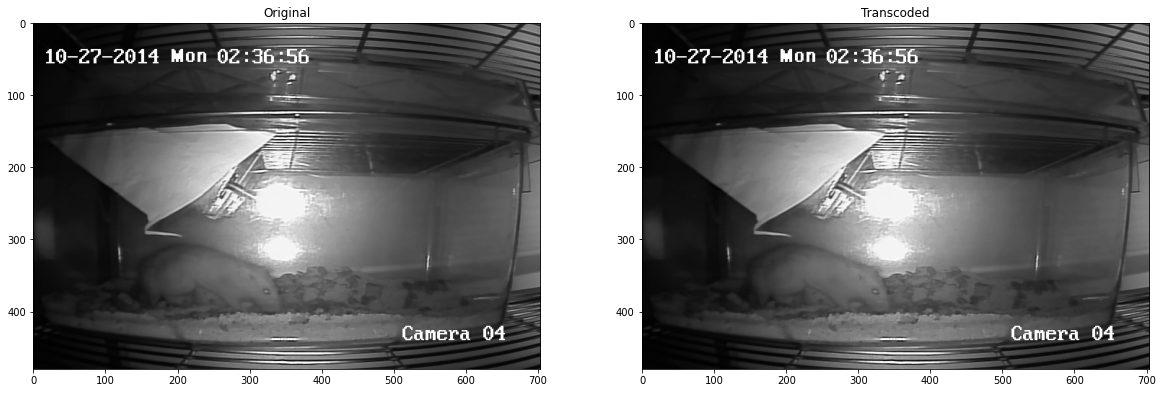

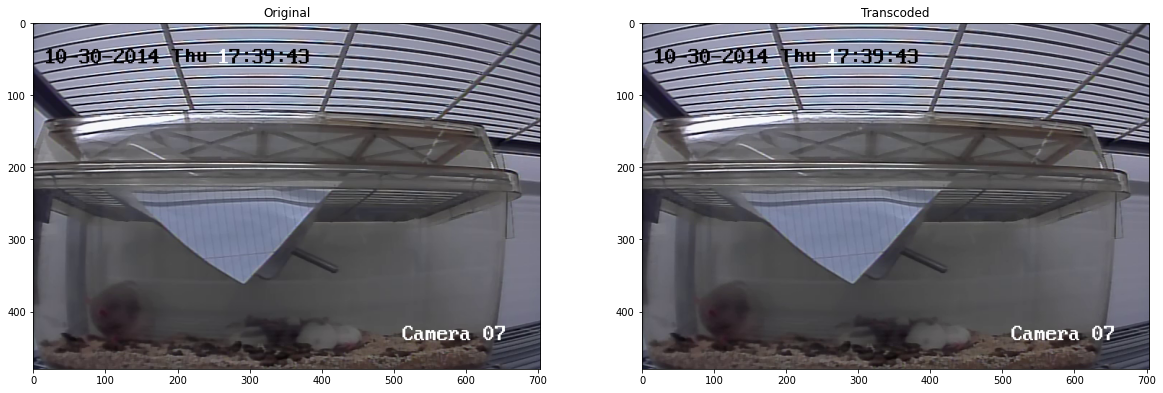

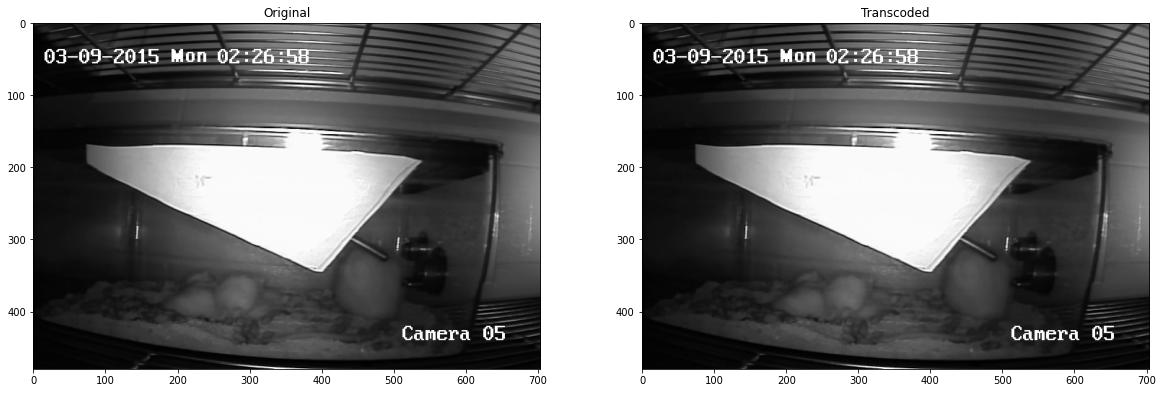

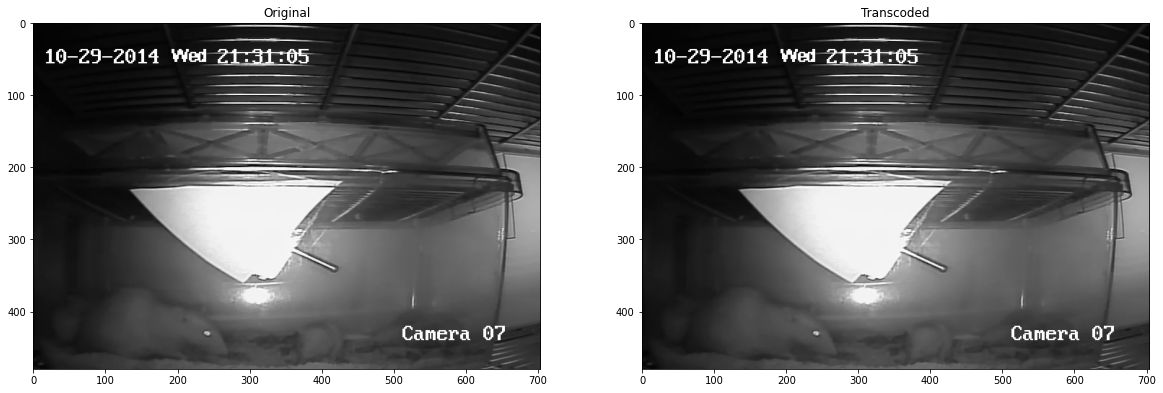

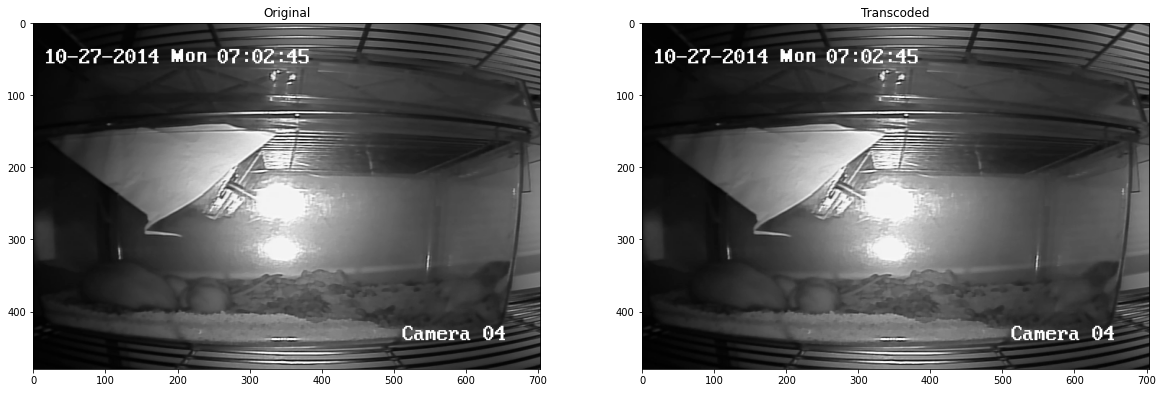

In [28]:
import numpy as np
import matplotlib.pyplot as plt

for idx, row in transcoded_metadata_df.sample(5).iterrows():
    frames = min(row.transcoded_frames, row.original_frames)
    frame_idx = np.random.randint(frames)
    
    original_cap = cv2.VideoCapture(str(row.original_file))
    original_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    transcoded_cap = cv2.VideoCapture(str(row.transcoded_file))
    transcoded_cap.set(cv2.CAP_PROP_POS_FRAMES, frame_idx)
    
    plt.figure(figsize=(20, 8))
    gs = plt.GridSpec(1, 2)
    plt.subplot(gs[0])
    plt.title('Original')
    ret, frame = original_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.subplot(gs[1])
    plt.title('Transcoded')
    ret, frame = transcoded_cap.read()
    frame = np.flip(frame, axis=2)
    plt.imshow(frame)
    
    plt.show()

In [29]:
print(
    (
        "So far we have transcoded {transcoded_count}/{total_count} videos, "
        "compressing them from {original_size:.1f}MB -> {transcoded_size:.1f}MB. "
        "This is {percentage:.1f}% of the original size, "
        "so we estimate it will shrink the total dataset of {total_original_size:.1f}GB -> {total_transcoded_size:.1f}GB."
    ).format(
        total_count=metadata_df.shape[0],
        transcoded_count=transcoded_metadata_df.shape[0],
        original_size=transcoded_metadata_df.original_filesize.sum()/1e6,
        transcoded_size=transcoded_metadata_df.transcoded_filesize.sum()/1e6,
        percentage=transcoded_metadata_df.transcoded_filesize.sum()/transcoded_metadata_df.original_filesize.sum()*100,
        total_original_size=metadata_df['size'].sum()/1e9,
        total_transcoded_size=metadata_df['size'].sum()/transcoded_metadata_df.original_filesize.sum()/1e9*transcoded_metadata_df.transcoded_filesize.sum(),
    )
)

So far we have transcoded 41/1916 videos, compressing them from 40471.2MB -> 11797.3MB. This is 29.1% of the original size, so we estimate it will shrink the total dataset of 1967.1GB -> 573.4GB.
